## City Classification

### Importing Files

In [77]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

### Loading Data

In [78]:
data=pd.read_csv("/home/student/Desktop/Practise_Folder/Project/Data/zomatoNCR.csv",encoding='latin-1')
data =data.loc[data['Country Code'] == 1]
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46


### Extracting Relevant Columns

In [79]:
data = data.loc[:, ['Average Cost for two', 'Aggregate rating', 'City']]
data

,Average Cost for two,Aggregate rating,City
624,850,3.9,Agra
625,700,3.5,Agra
626,500,3.6,Agra
627,400,4.0,Agra
628,1000,4.2,Agra
629,2000,4.0,Agra
630,2500,4.3,Agra
631,2500,4.0,Agra
632,800,3.6,Agra
633,3600,3.8,Agra


### Coverting Text Values to Numbers

In [80]:
labelencoder=LabelEncoder()
data.iloc[:,-1]=labelencoder.fit_transform(data.iloc[:,-1])
data

,Average Cost for two,Aggregate rating,City
624,850,3.9,0
625,700,3.5,0
626,500,3.6,0
627,400,4.0,0
628,1000,4.2,0
629,2000,4.0,0
630,2500,4.3,0
631,2500,4.0,0
632,800,3.6,0
633,3600,3.8,0


### Spliting X and Y Variable

In [81]:
X = data.iloc[:,[0,1]].values
Y = data.iloc[:,-1].values

In [82]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size = 0.25, random_state= 0)
sc_X = StandardScaler()

In [83]:
## Standarization of Values usin PCA and Standard Scaler
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components= 1,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.transform(X_test)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train.shape

(6489, 1)

### EDA -- Realation Between 'Average Cost for two', 'Aggregate rating'  and City

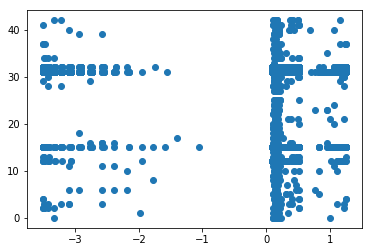

In [84]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
dictModel = {'SVC':  SVC(kernel = 'linear', random_state = 0),'Gaussian' : GaussianNB(), 'KNN': KNeighborsClassifier(n_neighbors=8, metric="minkowski", p=2), 'RandomForest': RandomForestClassifier(n_estimators=7, criterion = "entropy", random_state=0)}
finalScores = 0.0
finalModel = ""
for i, j in dictModel.items():
    print(j)
    scores = np.average(cross_val_score(j, X_train, Y_train, cv=5))
    
    if scores >= finalScores:
        finalScores = scores
        finalModel = i

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)


/home/student/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GaussianNB(priors=None, var_smoothing=1e-09)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')


/home/student/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


/home/student/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [86]:
print("Model:", finalModel) 
print("Score:", finalScores)

Model: SVC
Score: 0.6317370651907532
